# 6 - Advanced Viz
## 6.1
### category data type

In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/shymacbook/Documents/DataSci/PythonAZ/PythonAZ'

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [8]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


In [11]:
movies.Year.unique()

array([2009, 2008, 2010, 2007, 2011])

In [12]:
# convert variable to a category
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [13]:
# show the unique categories held in a column
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [14]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


## 6.2
### Joint Plots

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

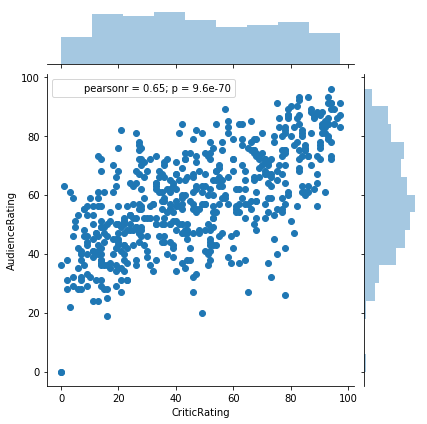

In [16]:
# making a Joint Plot
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating')

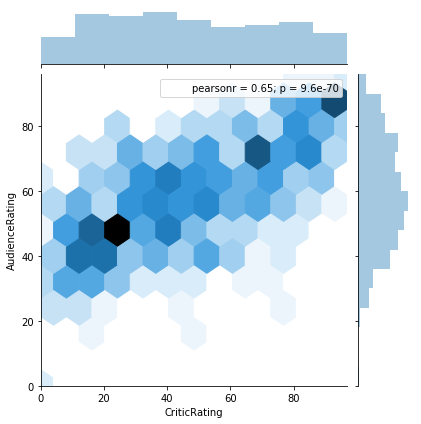

In [17]:
# making a Joint Plot with kind = HEX
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

## 6.3
### Histograms

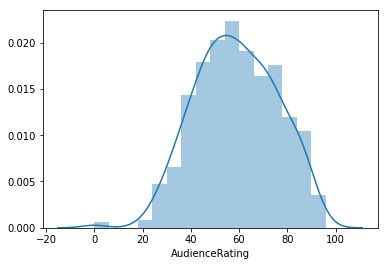

In [18]:
# Histograms with Seaborn
m1 = sns.distplot(movies.AudienceRating)

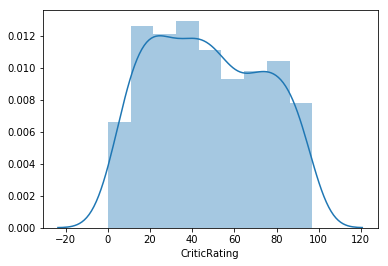

In [19]:
m2 = sns.distplot(movies.CriticRating)

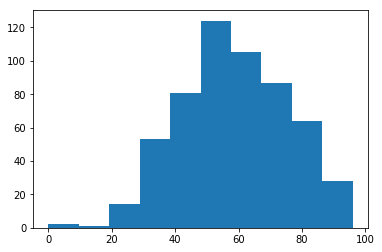

In [20]:
# Histograms with PyPlot
n1 = plt.hist(movies.AudienceRating)

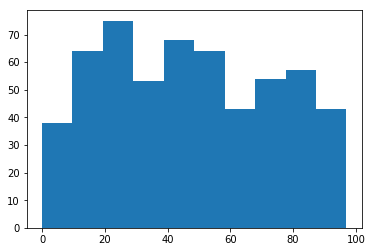

In [21]:
# sns.set_style("darkgrid")
# sns.set_style("white")
n1 = plt.hist(movies.CriticRating)

## 6.4
### Stacked Histogram

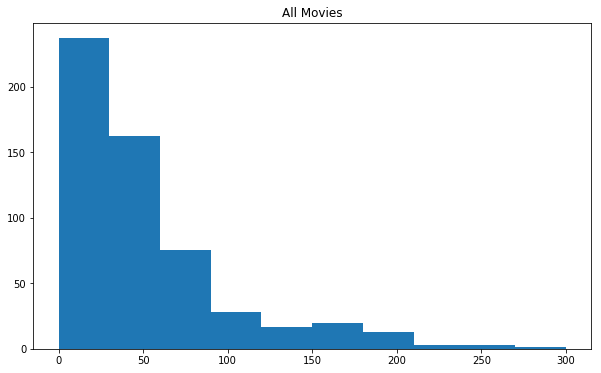

In [72]:
plt.rcParams['figure.figsize'] = 10,6
plt.hist(movies.BudgetMillions)
plt.title('All Movies')
plt.show()

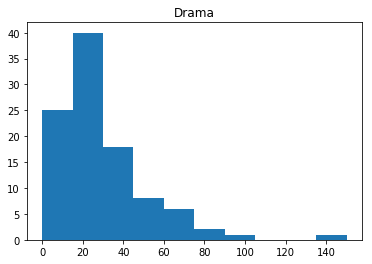

In [32]:
# hist for a genre - filter the data set
dramaFilter = movies.Genre == 'Drama'
plt.hist(movies[dramaFilter].BudgetMillions)
plt.title('Drama')
plt.show()

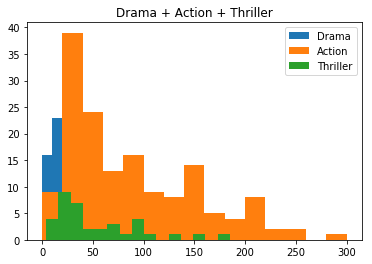

In [35]:
# multiple movie types, overlayed histograms
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.legend(['Drama','Action','Thriller'])
plt.title('Drama + Action + Thriller')
plt.show()

In [50]:
# Put each plt.his(..) row from above, into a list
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)    

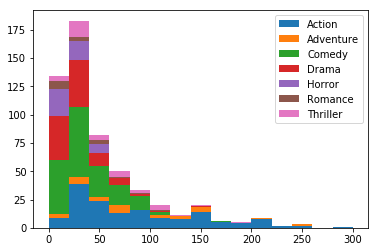

In [58]:
# make stacked histogram
h = plt.hist(list1, bins = 15, stacked = True, label = movies.Genre.cat.categories)
plt.legend()
plt.show()

## 6.5
### KDE plot

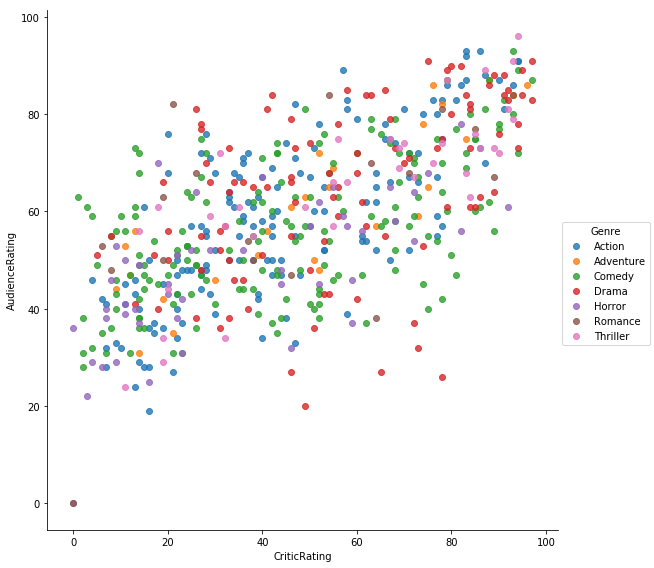

In [73]:
vis1 = sns.lmplot(data = movies, x = 'CriticRating', y = 'AudienceRating', fit_reg = False,
                 hue = 'Genre', size = 8, aspect = 1)

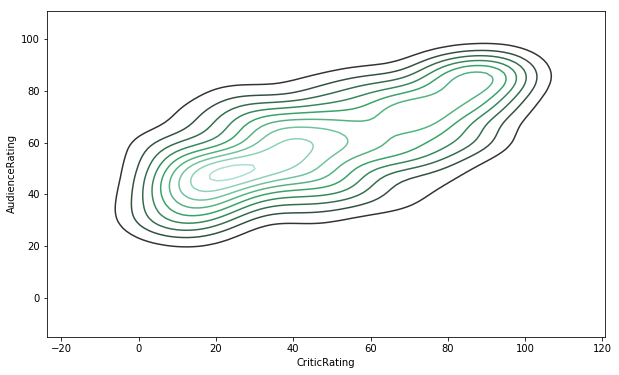

In [74]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating)

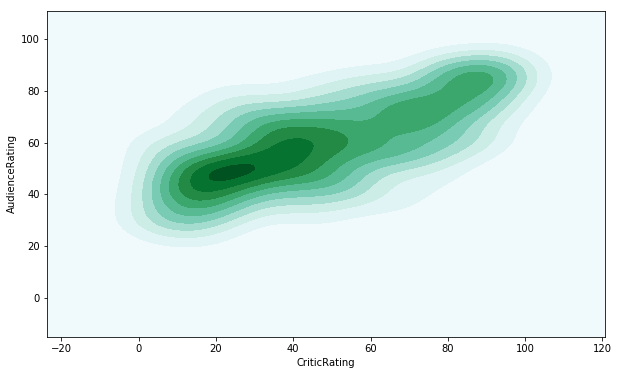

In [75]:
k2 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True)

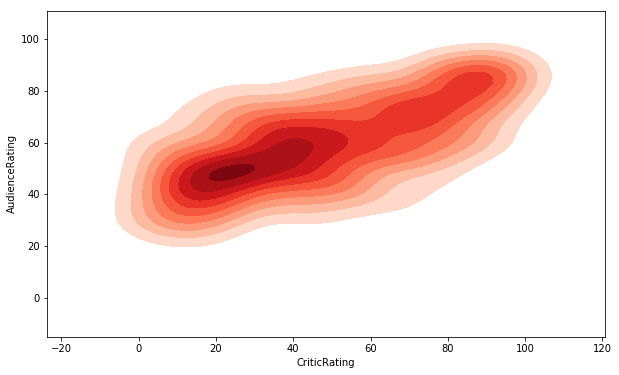

In [82]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, 
                 shade = True, shade_lowest = False, cmap = 'Reds')

## 6.6
### subplots

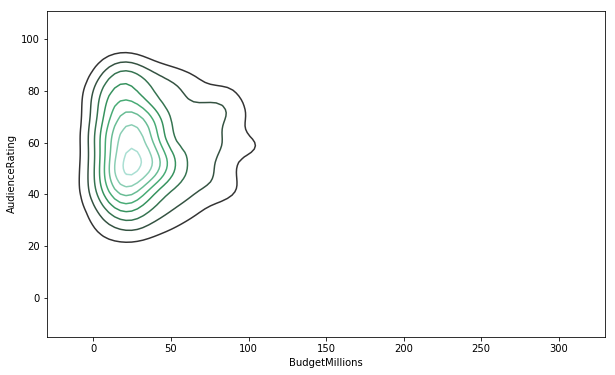

In [83]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

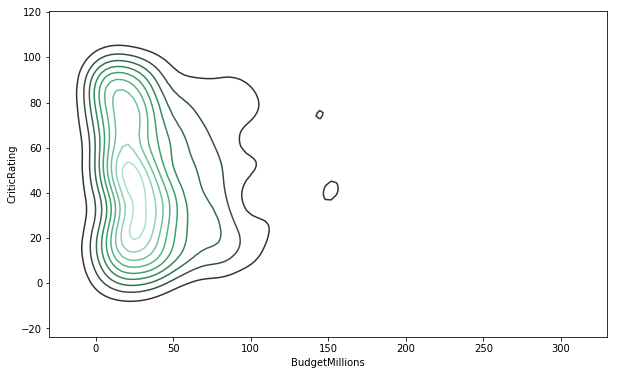

In [84]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

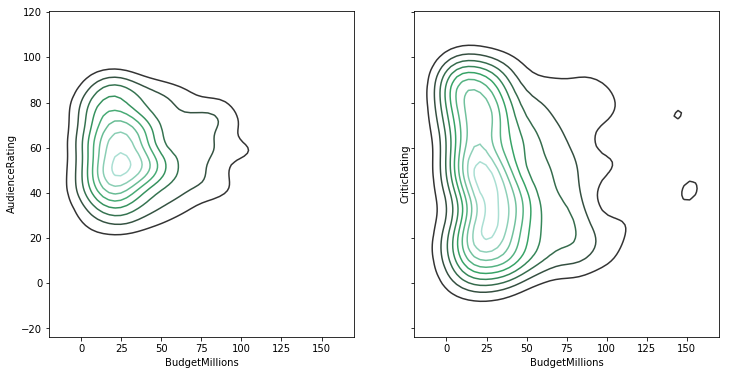

In [97]:
# make spot for 1 row & 2 columns of charts
f, axes = plt.subplots(1, 2, figsize = (12,6), sharex = True, sharey = True)
# put first chart in the axes[0] location
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0])
k1.set(xlim = (-20,170))
# put second chart in the axes[1] location
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1])

## 6.7
### violin vs box plots

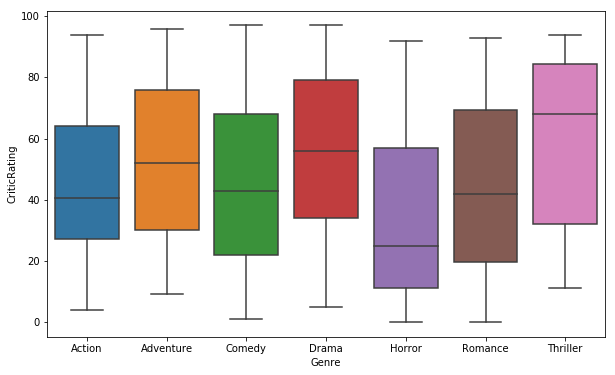

In [99]:
z = sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating')

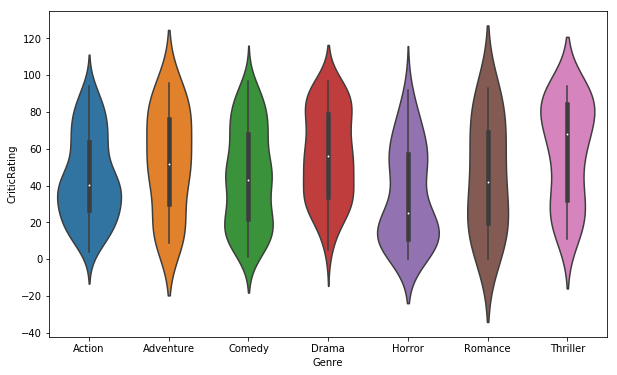

In [98]:
z = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating')

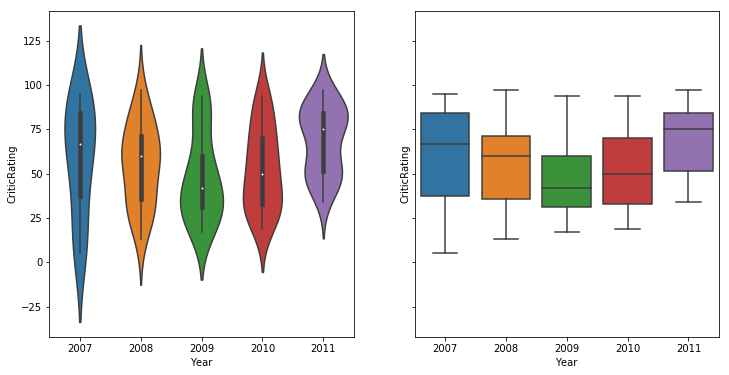

In [105]:
f, axes = plt.subplots(1, 2, figsize = (12,6), sharex = True, sharey = True)
sns.violinplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[0])
sns.boxplot(data = movies[movies.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[1])
plt.show()

## 6.8
### facet grid

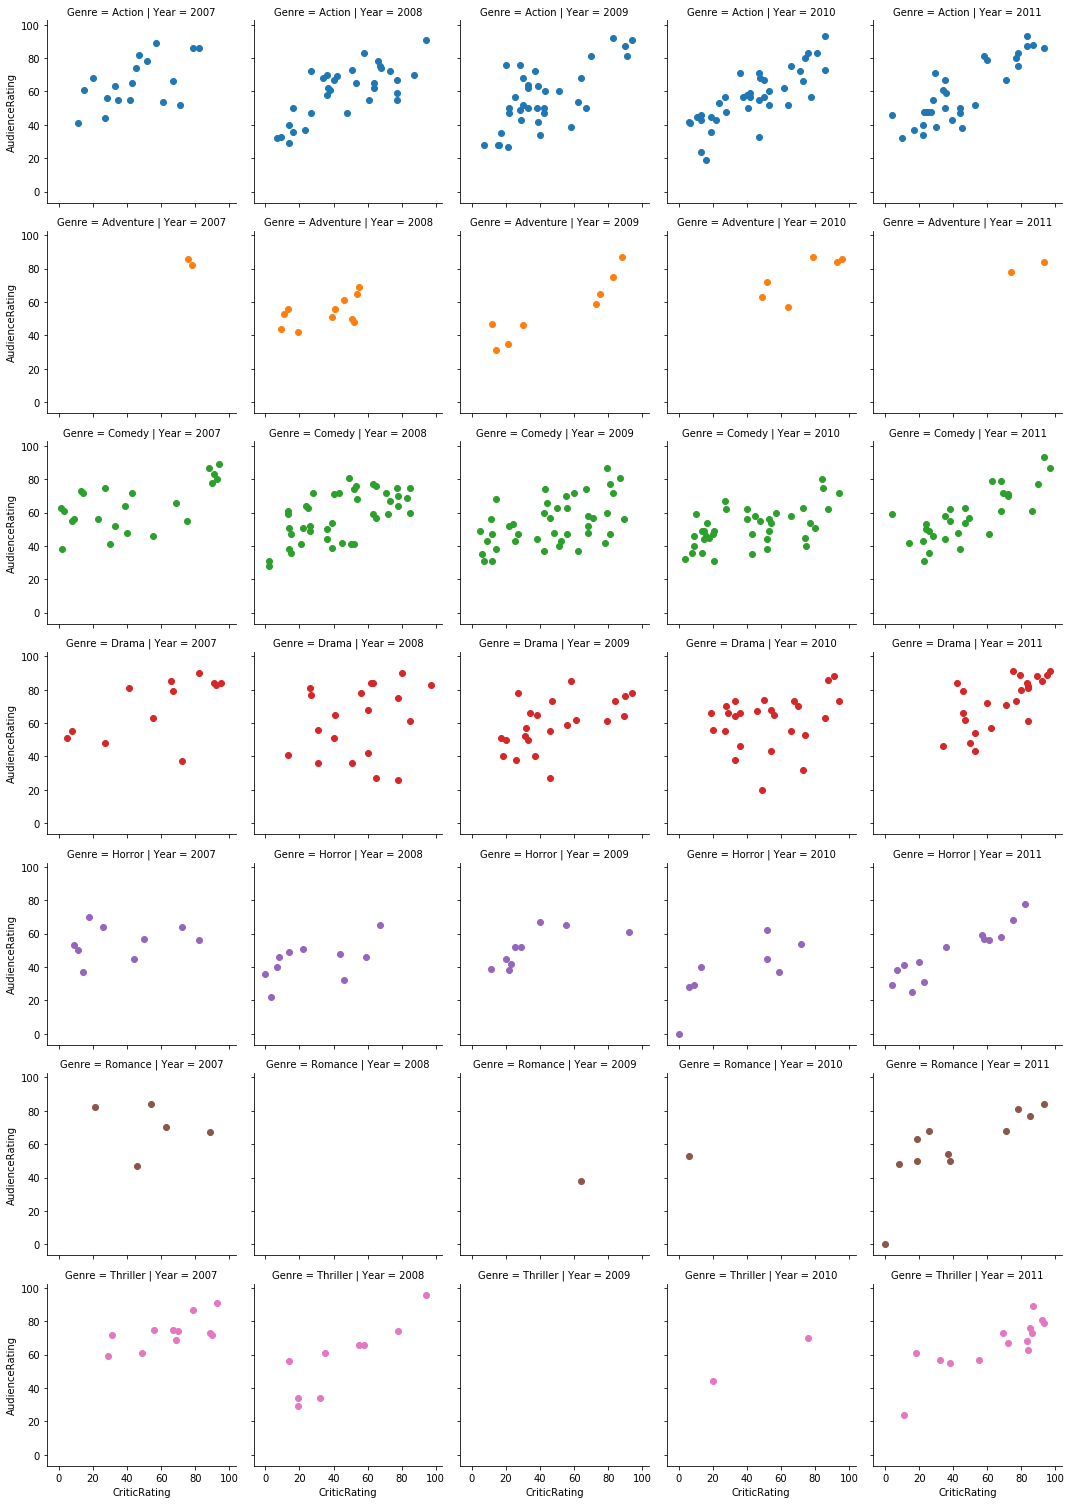

In [110]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

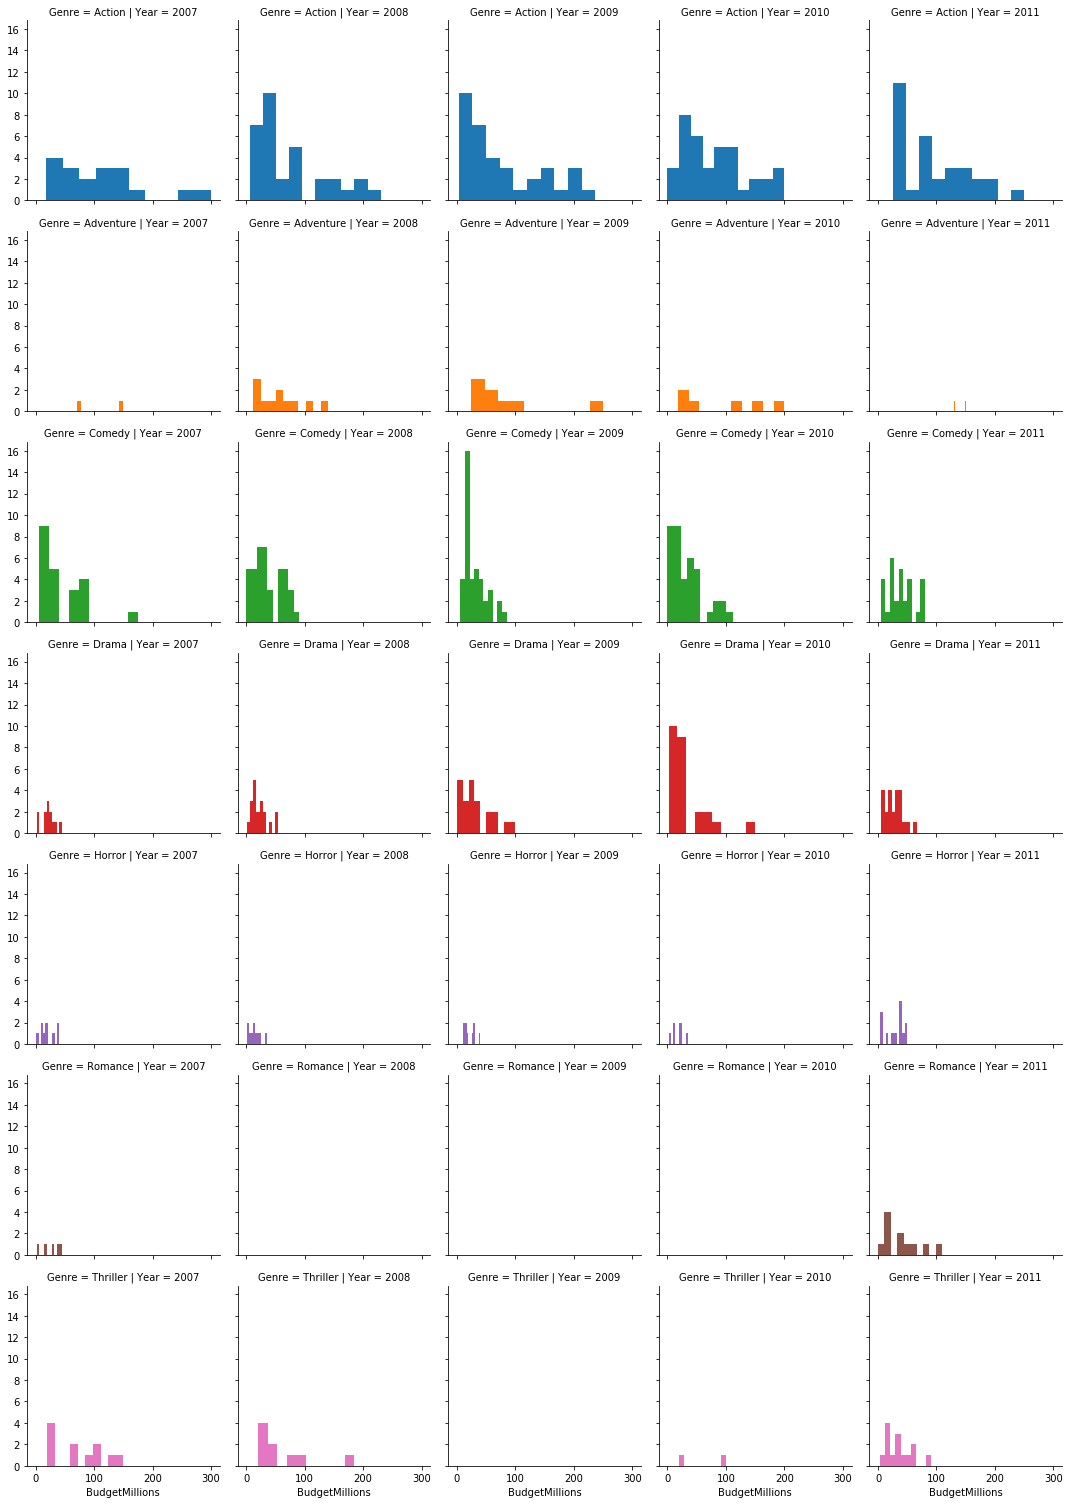

In [112]:
h = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
h = h.map(plt.hist, 'BudgetMillions')

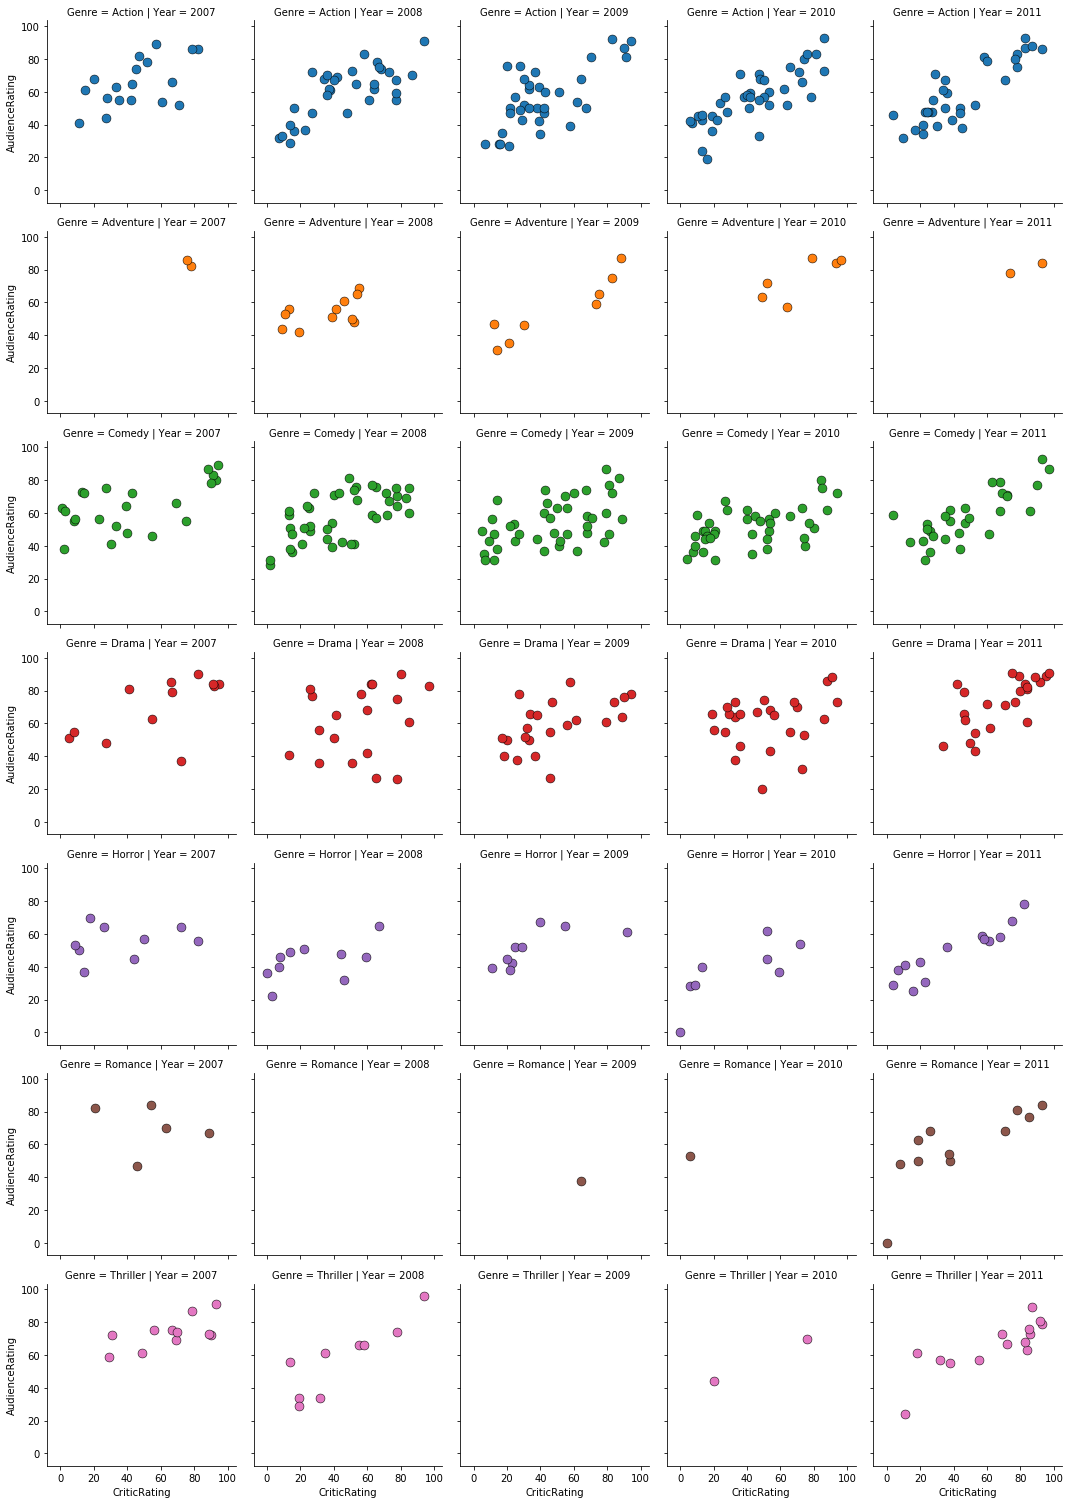

In [119]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s=80, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)